In [7]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline 

# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override()

In [96]:
# Thiết lập khoảng thời gian và phong cách tiêu đề 
sns.set_style('whitegrid')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 1, 1)

#Tải dữ liệu từ Yahoo Finance 
# df = web.DataReader('AAPL', start, end)
df = yf.download('AAPL', start=start, end=end)
df.xs('AAPL', axis=1, level='Ticker')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6588\2869647977.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.796835,26.838363,26.476150,26.716087,115127600
2017-01-04,26.766840,26.879889,26.704549,26.727620,84472400
2017-01-05,26.902962,26.960639,26.718394,26.743772,88774400
2017-01-06,27.202887,27.260564,26.870665,26.942184,127007600
2017-01-09,27.452049,27.553562,27.209806,27.212112,134247600
...,...,...,...,...,...
2020-12-24,128.591019,130.042874,127.743299,127.957667,54930100
2020-12-28,133.190186,133.823537,130.091599,130.559319,124486200
2020-12-29,131.416763,135.236393,130.900335,134.515350,121047300


In [97]:
import pandas as pd

# B1. Đọc lại dữ liệu gốc (nếu cần) hoặc lấy dataframe hiện có
# (nếu df đang tồn tại thì bỏ qua bước này)

# B2. Reset index để biến Date từ index -> thành cột
df.reset_index(inplace=True)

# B3. Lưu file ra CSV có cả cột Date
df.to_csv('AAPL.csv', index=False)

In [98]:
df.to_csv('AAPL.csv')
df1 = pd.read_csv('AAPL.csv', index_col='Date')

In [100]:
df.isna().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [101]:
df.isna().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [102]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2017-01-03,26.796835,26.838363,26.476150,26.716087,115127600
1,2017-01-04,26.766840,26.879889,26.704549,26.727620,84472400
2,2017-01-05,26.902962,26.960639,26.718394,26.743772,88774400
3,2017-01-06,27.202887,27.260564,26.870665,26.942184,127007600
4,2017-01-09,27.452049,27.553562,27.209806,27.212112,134247600
...,...,...,...,...,...,...
1002,2020-12-24,128.591019,130.042874,127.743299,127.957667,54930100
1003,2020-12-28,133.190186,133.823537,130.091599,130.559319,124486200
1004,2020-12-29,131.416763,135.236393,130.900335,134.515350,121047300


In [103]:
# Làm sạch dữ liệu
df = df.dropna()
df = df[df['Close'] != 0]

In [104]:
# Tính các đường trung bình cộng
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

In [115]:
# Vẽ biểu đồ giá đóng cửa và các đường MA
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')

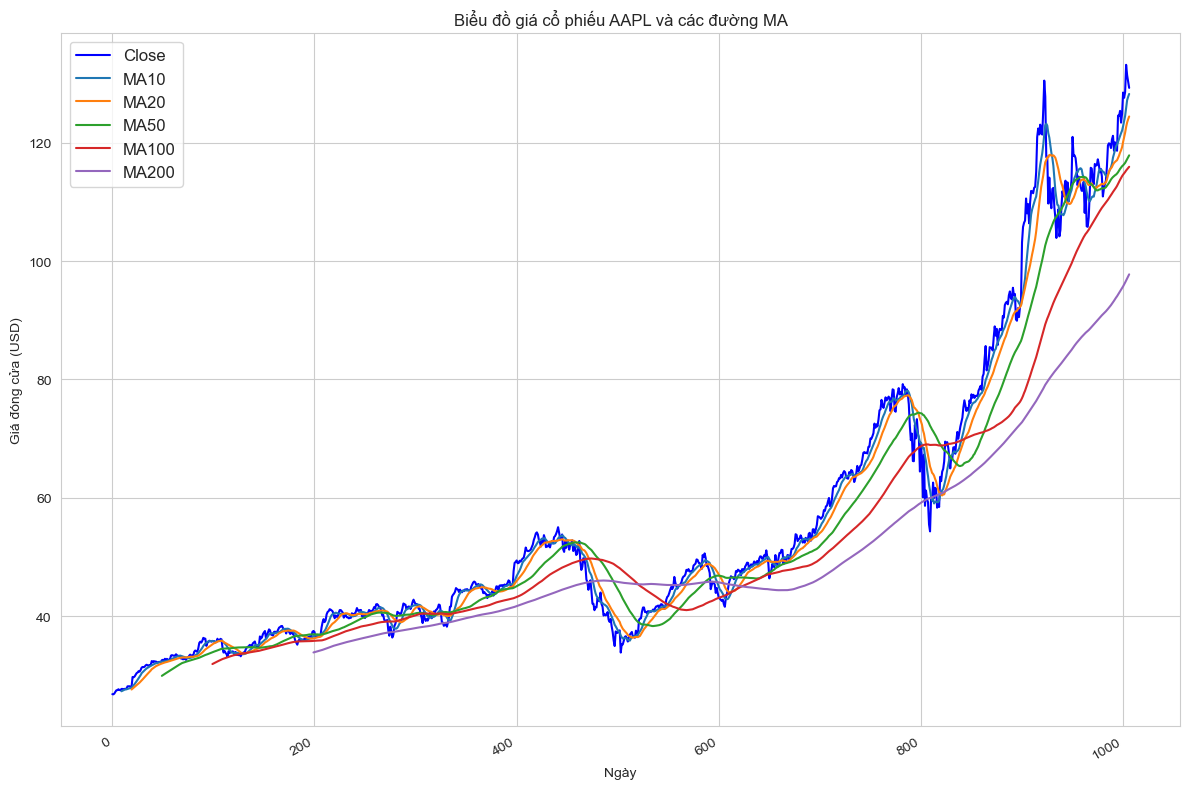

In [116]:
# Thiết lập nhãn và tiêu đề 
plt.title('Biểu đồ giá cổ phiếu AAPL và các đường MA')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (USD)')
plt.legend(loc='upper left', fontsize=12)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('AAPL_plot.png', dpi=300)
plt.show()
plt.savefig('AAPL_plot.png', dpi=300, bbox_inches='tight') # lưu biểu đồ với độ phân giải cao